## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-010-08-Evolutionary-Algorithm-05

## Part A - Load the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part B - Setup the parameters

In [2]:
POP_SIZE_MIN = 30
POP_SIZE_MAX = 31
POP_SIZE_STEP = 1

N_GENERATIONS_MIN = 30
N_GENERATIONS_MAX = 31
N_GENERATIONS_STEP = 1

N_MOVES_MIN = 300
N_MOVES_MAX = 301
N_MOVES_STEP = 1

In [3]:
DIRECTION_BOUND = [0, 1]
CROSS_RATE = 0.8
MUTATE_RATE = 0.0001
GOAL_POINT = [10, 5]
START_POINT = [0, 5]
OBSTACLE_LINE = np.array([[5, 2], [5, 8]])

## Part C - Define GA Class

In [4]:
class GA(object):
    def __init__(self, DNA_size, DNA_bound, cross_rate, mutation_rate, pop_size, ):
        self.DNA_size = DNA_size
        DNA_bound[1] += 1
        self.DNA_bound = DNA_bound
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size

        self.pop = np.random.randint(*DNA_bound, size=(pop_size, DNA_size))

    def DNA2product(self, DNA, n_moves, start_point):                 # convert to readable string
        pop = (DNA - 0.5) / 2
        pop[:, 0], pop[:, n_moves] = start_point[0], start_point[1]
        lines_x = np.cumsum(pop[:, :n_moves], axis=1)
        lines_y = np.cumsum(pop[:, n_moves:], axis=1)
        return lines_x, lines_y

    def get_fitness(self, lines_x, lines_y, goal_point, obstacle_line):
        dist2goal = np.sqrt((goal_point[0] - lines_x[:, -1]) ** 2 + (goal_point[1] - lines_y[:, -1]) ** 2)
        fitness = np.power(1 / (dist2goal + 1), 2)
        points = (lines_x > obstacle_line[0, 0] - 0.5) & (lines_x < obstacle_line[1, 0] + 0.5)
        y_values = np.where(points, lines_y, np.zeros_like(lines_y) - 100)
        bad_lines = ((y_values > obstacle_line[0, 1]) & (y_values < obstacle_line[1, 1])).max(axis=1)
        fitness[bad_lines] = 1e-6
        return fitness

    def select(self, fitness):
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fitness/fitness.sum())
        return self.pop[idx]

    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)  # select another individual from pop
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)   # choose crossover points
            parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
        return parent

    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                child[point] = np.random.randint(*self.DNA_bound)
        return child

    def evolve(self, fitness):
        pop = self.select(fitness)
        pop_copy = pop.copy()
        for parent in pop:  # for every parent
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop

## Part D - Define Line Class

In [5]:
class Line(object):
    def __init__(self, n_moves, goal_point, start_point, obstacle_line):
        self.n_moves = n_moves
        self.goal_point = goal_point
        self.start_point = start_point
        self.obstacle_line = obstacle_line

        plt.ion()

    def plotting(self, lines_x, lines_y):
        plt.cla()
        plt.scatter(*self.goal_point, s=200, c='r')
        plt.scatter(*self.start_point, s=100, c='b')
        plt.plot(self.obstacle_line[:, 0], self.obstacle_line[:, 1], lw=3, c='k')
        plt.plot(lines_x.T, lines_y.T, c='k')
        plt.xlim((-5, 15))
        plt.ylim((-5, 15))
        plt.pause(0.01)

## Part E - Evolve through the generations

In [6]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

Moves: 300 Pop Size: 30 Gen: 0 | best fit: 0.014318659686909464


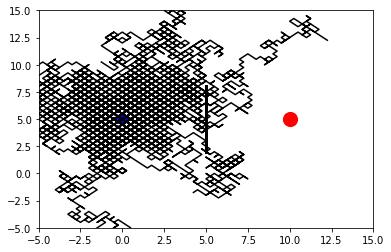

Moves: 300 Pop Size: 30 Gen: 1 | best fit: 0.01397791385527869


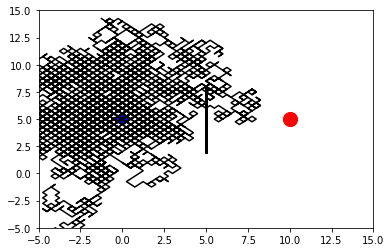

Moves: 300 Pop Size: 30 Gen: 2 | best fit: 0.0164722725173902


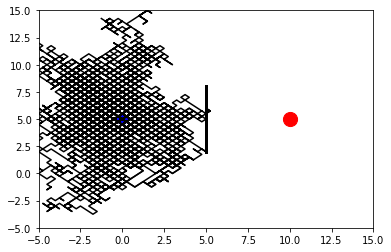

Moves: 300 Pop Size: 30 Gen: 3 | best fit: 0.0164722725173902


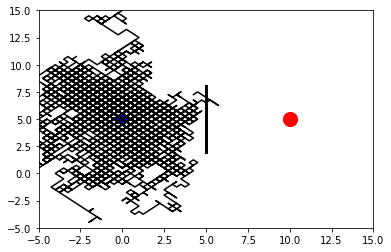

Moves: 300 Pop Size: 30 Gen: 4 | best fit: 0.012497617863104077


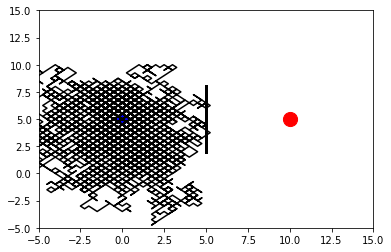

Moves: 300 Pop Size: 30 Gen: 5 | best fit: 0.05511402362405642


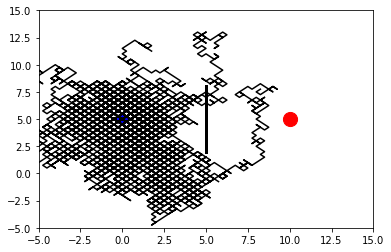

Moves: 300 Pop Size: 30 Gen: 6 | best fit: 0.13053920422250795


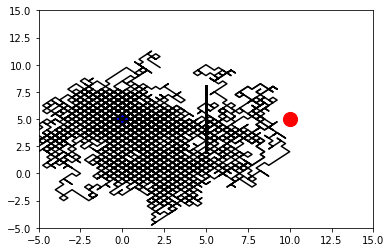

Moves: 300 Pop Size: 30 Gen: 7 | best fit: 0.16554986870309116


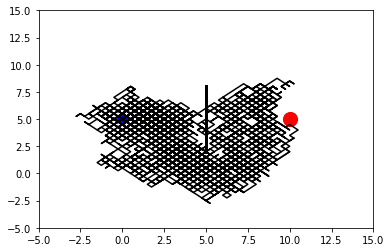

Moves: 300 Pop Size: 30 Gen: 8 | best fit: 0.16554986870309116


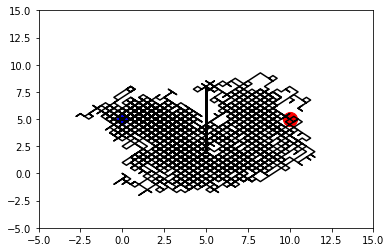

Moves: 300 Pop Size: 30 Gen: 9 | best fit: 0.3119016527346512


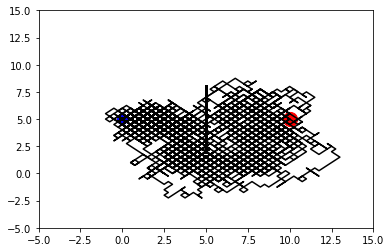

Moves: 300 Pop Size: 30 Gen: 10 | best fit: 0.3119016527346512


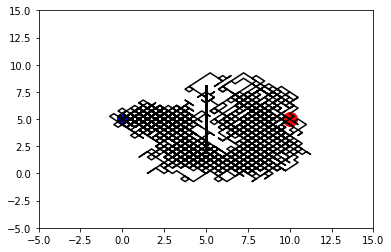

Moves: 300 Pop Size: 30 Gen: 11 | best fit: 0.545819714368591


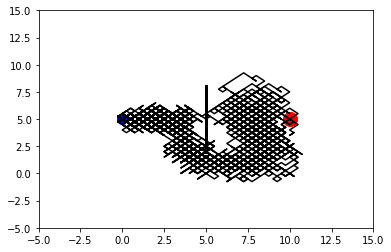

Moves: 300 Pop Size: 30 Gen: 12 | best fit: 0.545819714368591


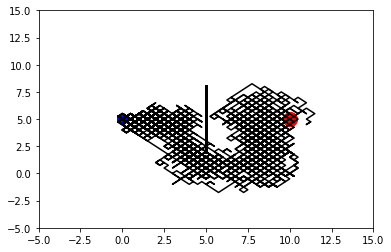

Moves: 300 Pop Size: 30 Gen: 13 | best fit: 0.545819714368591


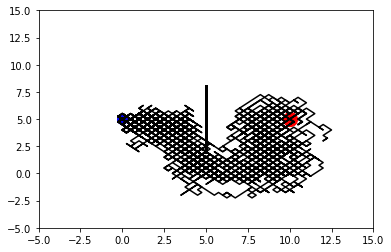

Moves: 300 Pop Size: 30 Gen: 14 | best fit: 0.545819714368591


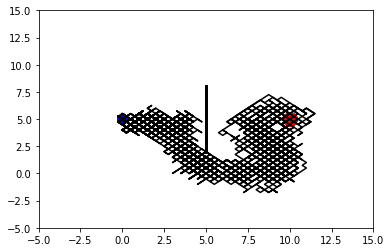

Moves: 300 Pop Size: 30 Gen: 15 | best fit: 0.545819714368591


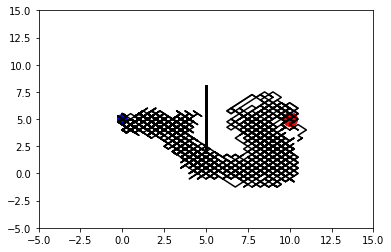

Moves: 300 Pop Size: 30 Gen: 16 | best fit: 0.545819714368591


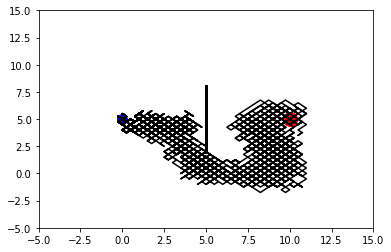

Moves: 300 Pop Size: 30 Gen: 17 | best fit: 0.545819714368591


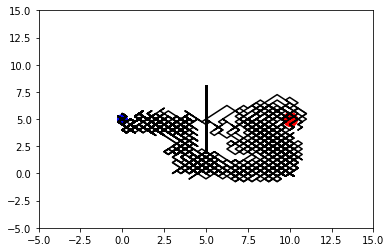

Moves: 300 Pop Size: 30 Gen: 18 | best fit: 0.545819714368591


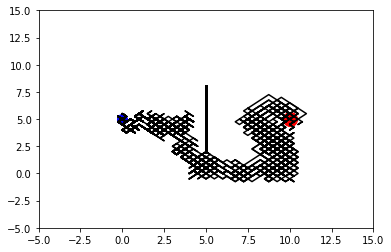

Moves: 300 Pop Size: 30 Gen: 19 | best fit: 0.545819714368591


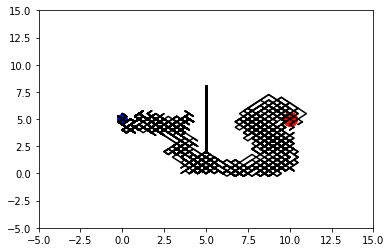

Moves: 300 Pop Size: 30 Gen: 20 | best fit: 0.545819714368591


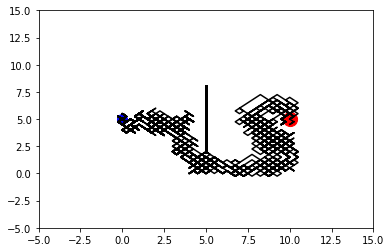

Moves: 300 Pop Size: 30 Gen: 21 | best fit: 0.545819714368591


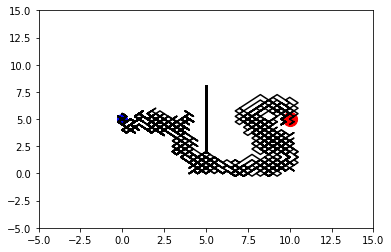

Moves: 300 Pop Size: 30 Gen: 22 | best fit: 0.545819714368591


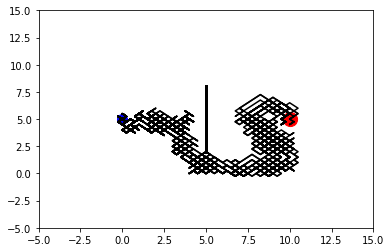

Moves: 300 Pop Size: 30 Gen: 23 | best fit: 0.545819714368591


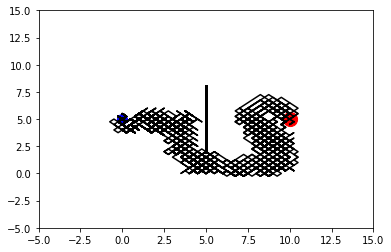

Moves: 300 Pop Size: 30 Gen: 24 | best fit: 0.545819714368591


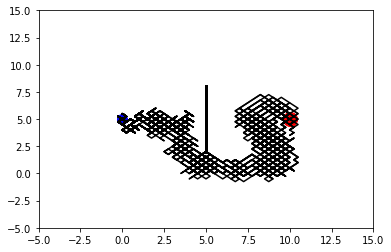

Moves: 300 Pop Size: 30 Gen: 25 | best fit: 0.545819714368591


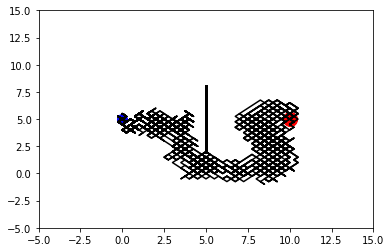

Moves: 300 Pop Size: 30 Gen: 26 | best fit: 0.545819714368591


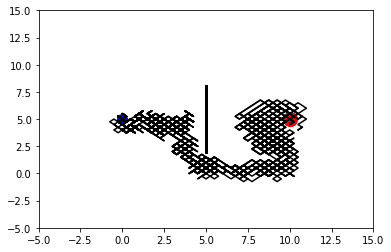

Moves: 300 Pop Size: 30 Gen: 27 | best fit: 0.545819714368591


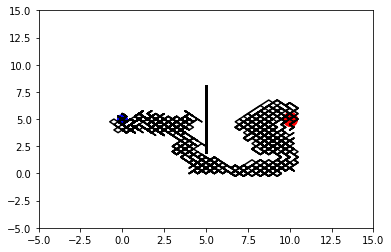

Moves: 300 Pop Size: 30 Gen: 28 | best fit: 0.545819714368591


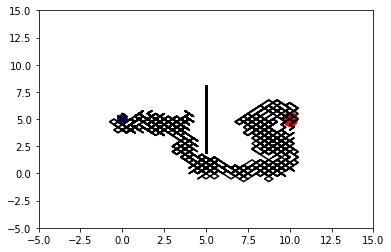

Moves: 300 Pop Size: 30 Gen: 29 | best fit: 0.545819714368591


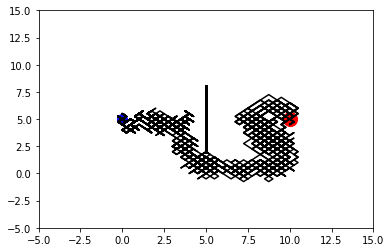

In [7]:
%matplotlib inline
for N_MOVES in range (N_MOVES_MIN, N_MOVES_MAX,N_MOVES_STEP):
    for N_GENERATIONS in range (N_GENERATIONS_MIN, N_GENERATIONS_MAX,N_GENERATIONS_STEP):
        for POP_SIZE in range (POP_SIZE_MIN, POP_SIZE_MAX,POP_SIZE_STEP):
            # Create GA object
            DNA_SIZE = N_MOVES*2
            ga = GA(DNA_size=DNA_SIZE, DNA_bound=DIRECTION_BOUND,
                cross_rate=CROSS_RATE, mutation_rate=MUTATE_RATE, pop_size=POP_SIZE)
            # Create Enviroment
            env = Line(N_MOVES, GOAL_POINT, START_POINT, OBSTACLE_LINE)
            plt.ion()       # something about plotting
            for generation in range(N_GENERATIONS):
                lx, ly = ga.DNA2product(ga.pop, N_MOVES, START_POINT)
                fitness = ga.get_fitness(lx, ly, GOAL_POINT, OBSTACLE_LINE)
                ga.evolve(fitness)
                print('Moves:', N_MOVES,'Pop Size:', POP_SIZE,'Gen:', generation, '| best fit:', fitness.max())
                env.plotting(lx, ly)
            plt.ioff()
            plt.show()

## Done

In [8]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-27 13:55:50.289146
